In [110]:
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import asarray
from numpy.random import randn
from numpy.random import randint
from keras.datasets.mnist import load_data
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.layers import Lambda
from keras.layers import Activation
from matplotlib import pyplot
from keras import backend
import tensorflow as tf
import pandas as pd
import numpy as np
import glob
import os
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import scale
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [111]:
features = pd.read_csv('C:/Users/abc99/OneDrive/바탕 화면/2023 2학기 파일 전체 모음/딥러닝응용/pamap2.csv', index_col=0)

In [112]:
features

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
2932,37.70,1,100.0,30.3750,2.301060,7.25857,6.09259,2.207200,7.24042,5.95555,...,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1.000000,0.000000,0.000000,0.000000,1
2943,37.81,1,100.0,30.3750,2.246150,7.48180,5.55219,2.251300,7.40595,5.65313,...,-0.017912,0.015243,-60.7820,-36.2116,-58.4891,1.000000,0.000000,0.000000,0.000000,1
2954,37.92,1,100.0,30.3750,2.300000,7.10681,6.09309,2.346130,7.46611,6.12103,...,-0.011798,0.011387,-61.4531,-36.2983,-58.4845,1.000000,0.000000,0.000000,0.000000,1
2965,38.03,1,100.0,30.3750,2.494550,7.52335,6.17157,2.591060,7.76653,6.27112,...,-0.009233,0.005823,-62.0065,-36.7217,-58.3608,1.000000,0.000000,0.000000,0.000000,1
2976,38.14,1,101.0,30.3750,2.716540,8.30596,4.78671,2.595960,7.94641,4.86635,...,-0.042562,-0.009289,-60.4311,-37.5412,-59.0013,1.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818402,3629.66,5,195.0,30.8125,0.565086,2.59595,9.27677,0.660681,2.70904,9.44024,...,-0.002287,-0.017737,-17.6912,12.0079,26.5782,0.164776,0.798149,0.227263,0.533065,8
2818413,3629.77,5,195.0,30.8125,0.570697,2.82459,9.39155,0.495537,2.75557,9.47051,...,-0.007246,0.007512,-17.6928,12.0076,26.4364,0.166393,0.797223,0.228965,0.533221,8
2818423,3629.87,5,195.0,30.8125,0.756704,2.78452,9.31749,0.781122,2.72325,9.40988,...,0.003818,0.017649,-17.9459,11.7619,26.1521,0.166735,0.797039,0.229771,0.533041,8
2818435,3629.99,5,195.0,30.8125,0.530504,2.67279,9.35297,0.540382,2.87591,9.30409,...,-0.003649,-0.002610,-18.2103,12.4200,26.5759,0.168936,0.795763,0.231222,0.533628,8


In [113]:
label = LabelEncoder()
features['activityID'] = label.fit_transform(features['activityID'])
features.head()

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
2932,37.70,0,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1.0,0.0,0.0,0.0,1
2943,37.81,0,100.0,30.375,2.24615,7.48180,5.55219,2.25130,7.40595,5.65313,...,-0.017912,0.015243,-60.7820,-36.2116,-58.4891,1.0,0.0,0.0,0.0,1
2954,37.92,0,100.0,30.375,2.30000,7.10681,6.09309,2.34613,7.46611,6.12103,...,-0.011798,0.011387,-61.4531,-36.2983,-58.4845,1.0,0.0,0.0,0.0,1
2965,38.03,0,100.0,30.375,2.49455,7.52335,6.17157,2.59106,7.76653,6.27112,...,-0.009233,0.005823,-62.0065,-36.7217,-58.3608,1.0,0.0,0.0,0.0,1
2976,38.14,0,101.0,30.375,2.71654,8.30596,4.78671,2.59596,7.94641,4.86635,...,-0.042562,-0.009289,-60.4311,-37.5412,-59.0013,1.0,0.0,0.0,0.0,1


In [114]:
features['activityID'].value_counts()

3    20998
0    17575
2    17256
1    16881
5    16857
6    10699
7     9585
4     8665
Name: activityID, dtype: int64

<AxesSubplot:xlabel='activityID', ylabel='count'>

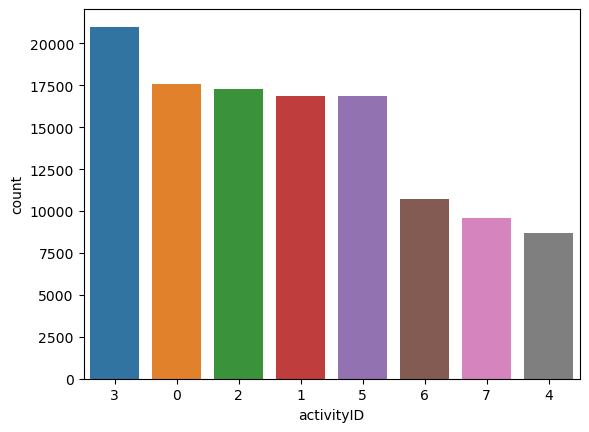

In [115]:
sns.countplot(x = "activityID", data = features, order = features.activityID.value_counts().index)

In [116]:
indexes = features[features['activityID'] == 0].index
features.drop(indexes , inplace=True)

[ Hand & Hand ]

In [117]:
from sklearn.preprocessing import StandardScaler

X = features[['handAcc16_1' , 'handAcc16_2' , 'handAcc16_3' ,
    'handAcc6_1' , 'handAcc6_2' , 'handAcc6_3' ,
    'handGyro1' , 'handGyro2',   'handGyro3' ,      
    'handMagne1',  'handMagne2' , 'handMagne3',  
    'chestAcc16_1', 'chestAcc16_2',  'chestAcc16_3',   
    'chestAcc6_1',  'chestAcc6_2',  'chestAcc6_3',
    'chestGyro1',   'chestGyro2',   'chestGyro3',    
    'chestMagne1', 'chestMagne2' , 'chestMagne3', 
    'ankleAcc16_1',   'ankleAcc16_2',  'ankleAcc16_3',
    'ankleAcc6_1',  'ankleAcc6_2',  'ankleAcc6_3',   
    'ankleGyro1' ,   'ankleGyro2',   'ankleGyro3',    
    'ankleMagne1' , 'ankleMagne2' ,'ankleMagne3']]
y= features['activityID']

scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['handAcc16_1' , 'handAcc16_2' , 'handAcc16_3' ,
    'handAcc6_1' , 'handAcc6_2' , 'handAcc6_3' ,
    'handGyro1' , 'handGyro2',   'handGyro3' ,      
    'handMagne1',  'handMagne2' , 'handMagne3',  
    'chestAcc16_1', 'chestAcc16_2',  'chestAcc16_3',   
    'chestAcc6_1',  'chestAcc6_2',  'chestAcc6_3',
    'chestGyro1',   'chestGyro2',   'chestGyro3',    
    'chestMagne1', 'chestMagne2' , 'chestMagne3', 
    'ankleAcc16_1',   'ankleAcc16_2',  'ankleAcc16_3',
    'ankleAcc6_1',  'ankleAcc6_2',  'ankleAcc6_3',   
    'ankleGyro1' ,   'ankleGyro2',   'ankleGyro3',    
    'ankleMagne1' , 'ankleMagne2' ,'ankleMagne3'])
scaled_X['label'] = y.values

In [118]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_X, 
                                                    scaled_X["label"],
                                                    test_size = 0.95, 
                                                    shuffle = True, 
                                                    random_state = 21)

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_X, 
                                                    scaled_X["label"],
                                                    test_size = 0.95, 
                                                    shuffle = True, 
                                                    random_state = 21)

In [120]:
TIME_STEPS = 40
STEP = 10

In [121]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)        
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)


X_train, y_train = create_dataset(X_train[['handAcc16_1' , 'handAcc16_2' , 'handAcc16_3' ,
    'handAcc6_1' , 'handAcc6_2' , 'handAcc6_3' ,
    'handGyro1' , 'handGyro2',   'handGyro3' ,      
    'handMagne1',  'handMagne2' , 'handMagne3']], X_train.label, TIME_STEPS,
                                  STEP)
X_test, y_test = create_dataset(X_test[[  
    'chestAcc16_1', 'chestAcc16_2',  'chestAcc16_3',   
    'chestAcc6_1',  'chestAcc6_2',  'chestAcc6_3',
    'chestGyro1',   'chestGyro2',   'chestGyro3',    
    'chestMagne1', 'chestMagne2' , 'chestMagne3']], X_test.label, TIME_STEPS, STEP)

print(X_train.shape, y_train.shape)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_24252\542931380.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ys.append(stats.mode(labels)[0][0])
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_24252\542931380.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to av

(501, 40, 12) (501, 1)


In [122]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown = "ignore", sparse = False)
enc = enc.fit(y_train)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

In [123]:
print("X_train.shape: ", X_train.shape)
print("X_test.shape ", X_test.shape)
print("y_train.shape ", y_train.shape)
print("y_test.shape ", y_test.shape)

X_train.shape:  (501, 40, 12)
X_test.shape  (9586, 40, 12)
y_train.shape  (501, 7)
y_test.shape  (9586, 7)


In [124]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.utils import to_categorical

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D
from keras.utils import np_utils

In [125]:
#Epoch 500

verbose,epochs,batch_size=1,10,32 

n_timesteps,n_features,n_outputs=X_train.shape[1],X_train.shape[2],y_train.shape[1]

In [126]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

In [127]:
n_timesteps, n_features, n_outputs

(40, 12, 7)

In [128]:
model = Sequential()
model.add(LSTM(64,input_shape = [n_timesteps, n_features],
return_sequences = True))
model.add(LSTM(128))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(n_outputs,activation = "softmax"))

In [129]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [130]:
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_split = 0.1, shuffle = True)
print(model.summary())

Epoch 1/100
15/15 [==============================] - 6s 101ms/step - loss: 1.8251 - accuracy: 0.3889 - val_loss: 1.7332 - val_accuracy: 0.3529
Epoch 2/100
15/15 [==============================] - 1s 47ms/step - loss: 1.5290 - accuracy: 0.4778 - val_loss: 1.6139 - val_accuracy: 0.3725
Epoch 3/100
15/15 [==============================] - 1s 51ms/step - loss: 1.3601 - accuracy: 0.5156 - val_loss: 1.5475 - val_accuracy: 0.3333
Epoch 4/100
15/15 [==============================] - 1s 46ms/step - loss: 1.3364 - accuracy: 0.5311 - val_loss: 1.5159 - val_accuracy: 0.3333
Epoch 5/100
15/15 [==============================] - 1s 46ms/step - loss: 1.2445 - accuracy: 0.5333 - val_loss: 1.5026 - val_accuracy: 0.3333
Epoch 6/100
15/15 [==============================] - 1s 51ms/step - loss: 1.2369 - accuracy: 0.5622 - val_loss: 1.5554 - val_accuracy: 0.3333
Epoch 7/100
15/15 [==============================] - 1s 45ms/step - loss: 1.1739 - accuracy: 0.5822 - val_loss: 1.4664 - val_accuracy: 0.3529
Epoch

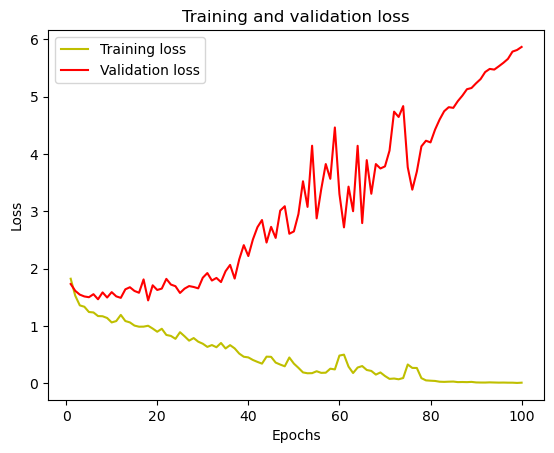

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

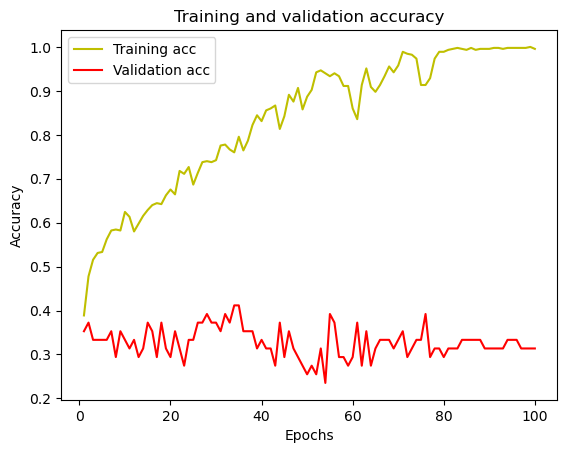

In [132]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [133]:
base_loss,base_accuracy=model.evaluate(X_test,y_test,batch_size=batch_size,verbose=1)
  
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

300/300 [==============================] - 6s 20ms/step - loss: 6.8547 - accuracy: 0.2667
Accuracy >26.674315
Base Loss >6.85


[ Hand & Chest ]

In [134]:
from sklearn.preprocessing import StandardScaler

X = features[['handAcc16_1' , 'handAcc16_2' , 'handAcc16_3' ,
    'handAcc6_1' , 'handAcc6_2' , 'handAcc6_3' ,
    'handGyro1' , 'handGyro2',   'handGyro3' ,      
    'handMagne1',  'handMagne2' , 'handMagne3',  
    'chestAcc16_1', 'chestAcc16_2',  'chestAcc16_3',   
    'chestAcc6_1',  'chestAcc6_2',  'chestAcc6_3',
    'chestGyro1',   'chestGyro2',   'chestGyro3',    
    'chestMagne1', 'chestMagne2' , 'chestMagne3', 
    'ankleAcc16_1',   'ankleAcc16_2',  'ankleAcc16_3',
    'ankleAcc6_1',  'ankleAcc6_2',  'ankleAcc6_3',   
    'ankleGyro1' ,   'ankleGyro2',   'ankleGyro3',    
    'ankleMagne1' , 'ankleMagne2' ,'ankleMagne3']]
y= features['activityID']

scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['handAcc16_1' , 'handAcc16_2' , 'handAcc16_3' ,
    'handAcc6_1' , 'handAcc6_2' , 'handAcc6_3' ,
    'handGyro1' , 'handGyro2',   'handGyro3' ,      
    'handMagne1',  'handMagne2' , 'handMagne3',  
    'chestAcc16_1', 'chestAcc16_2',  'chestAcc16_3',   
    'chestAcc6_1',  'chestAcc6_2',  'chestAcc6_3',
    'chestGyro1',   'chestGyro2',   'chestGyro3',    
    'chestMagne1', 'chestMagne2' , 'chestMagne3', 
    'ankleAcc16_1',   'ankleAcc16_2',  'ankleAcc16_3',
    'ankleAcc6_1',  'ankleAcc6_2',  'ankleAcc6_3',   
    'ankleGyro1' ,   'ankleGyro2',   'ankleGyro3',    
    'ankleMagne1' , 'ankleMagne2' ,'ankleMagne3'])
scaled_X['label'] = y.values

In [135]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_X, 
                                                    scaled_X["label"],
                                                    test_size = 0.95, 
                                                    shuffle = True, 
                                                    random_state = 21)

In [136]:
TIME_STEPS = 40
STEP = 10

In [137]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)        
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)


X_train, y_train = create_dataset(X_train[['handAcc16_1' , 'handAcc16_2' , 'handAcc16_3' ,
    'handAcc6_1' , 'handAcc6_2' , 'handAcc6_3' ,
    'handGyro1' , 'handGyro2',   'handGyro3' ,      
    'handMagne1',  'handMagne2' , 'handMagne3']], X_train.label, TIME_STEPS,
                                  STEP)
X_test, y_test = create_dataset(X_test[[  
    'chestAcc16_1', 'chestAcc16_2',  'chestAcc16_3',   
    'chestAcc6_1',  'chestAcc6_2',  'chestAcc6_3',
    'chestGyro1',   'chestGyro2',   'chestGyro3',    
    'chestMagne1', 'chestMagne2' , 'chestMagne3']], X_test.label, TIME_STEPS, STEP)

print(X_train.shape, y_train.shape)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_24252\542931380.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ys.append(stats.mode(labels)[0][0])
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_24252\542931380.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to av

(501, 40, 12) (501, 1)


In [138]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown = "ignore", sparse = False)
enc = enc.fit(y_train)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

In [139]:
print("X_train.shape: ", X_train.shape)
print("X_test.shape ", X_test.shape)
print("y_train.shape ", y_train.shape)
print("y_test.shape ", y_test.shape)

X_train.shape:  (501, 40, 12)
X_test.shape  (9586, 40, 12)
y_train.shape  (501, 7)
y_test.shape  (9586, 7)


In [140]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.utils import to_categorical

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D
from keras.utils import np_utils

In [141]:
#Epoch 500

verbose,epochs,batch_size=1,10,32 

n_timesteps,n_features,n_outputs=X_train.shape[1],X_train.shape[2],y_train.shape[1]

In [142]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

In [143]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [144]:
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_split = 0.1, shuffle = True)
print(model.summary())

Epoch 1/100
15/15 [==============================] - 5s 108ms/step - loss: 0.0649 - accuracy: 0.9867 - val_loss: 5.6375 - val_accuracy: 0.3725
Epoch 2/100
15/15 [==============================] - 1s 44ms/step - loss: 0.1574 - accuracy: 0.9711 - val_loss: 5.5340 - val_accuracy: 0.3333
Epoch 3/100
15/15 [==============================] - 1s 46ms/step - loss: 0.0723 - accuracy: 0.9756 - val_loss: 5.6052 - val_accuracy: 0.2941
Epoch 4/100
15/15 [==============================] - 1s 53ms/step - loss: 0.0610 - accuracy: 0.9844 - val_loss: 5.4919 - val_accuracy: 0.2941
Epoch 5/100
15/15 [==============================] - 1s 52ms/step - loss: 0.1034 - accuracy: 0.9733 - val_loss: 4.8847 - val_accuracy: 0.3725
Epoch 6/100
15/15 [==============================] - 1s 52ms/step - loss: 0.0721 - accuracy: 0.9778 - val_loss: 5.4706 - val_accuracy: 0.3333
Epoch 7/100
15/15 [==============================] - 1s 57ms/step - loss: 0.0890 - accuracy: 0.9778 - val_loss: 4.6534 - val_accuracy: 0.3333
Epoch

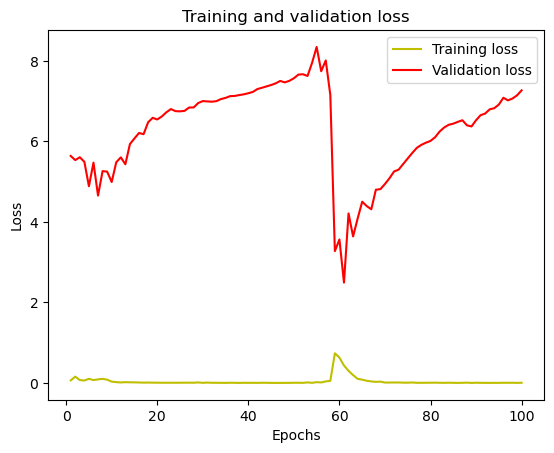

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

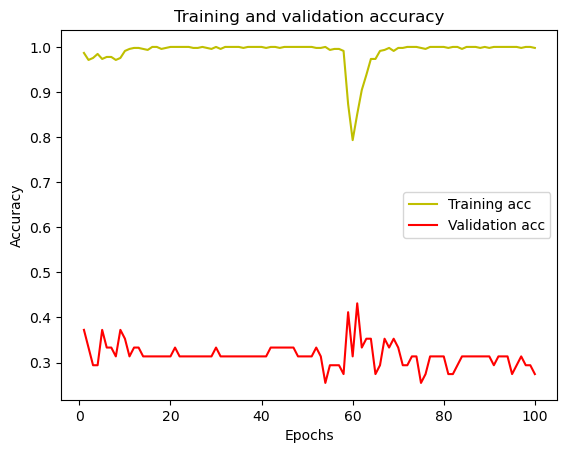

In [146]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [147]:
base_loss,base_accuracy=model.evaluate(X_test,y_test,batch_size=batch_size,verbose=1)
  
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

300/300 [==============================] - 6s 20ms/step - loss: 8.1225 - accuracy: 0.2580
Accuracy >25.798038
Base Loss >8.12


[ Chest & Chest ]

In [148]:
from sklearn.preprocessing import StandardScaler

X = features[['handAcc16_1' , 'handAcc16_2' , 'handAcc16_3' ,
    'handAcc6_1' , 'handAcc6_2' , 'handAcc6_3' ,
    'handGyro1' , 'handGyro2',   'handGyro3' ,      
    'handMagne1',  'handMagne2' , 'handMagne3',  
    'chestAcc16_1', 'chestAcc16_2',  'chestAcc16_3',   
    'chestAcc6_1',  'chestAcc6_2',  'chestAcc6_3',
    'chestGyro1',   'chestGyro2',   'chestGyro3',    
    'chestMagne1', 'chestMagne2' , 'chestMagne3', 
    'ankleAcc16_1',   'ankleAcc16_2',  'ankleAcc16_3',
    'ankleAcc6_1',  'ankleAcc6_2',  'ankleAcc6_3',   
    'ankleGyro1' ,   'ankleGyro2',   'ankleGyro3',    
    'ankleMagne1' , 'ankleMagne2' ,'ankleMagne3']]
y= features['activityID']

scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['handAcc16_1' , 'handAcc16_2' , 'handAcc16_3' ,
    'handAcc6_1' , 'handAcc6_2' , 'handAcc6_3' ,
    'handGyro1' , 'handGyro2',   'handGyro3' ,      
    'handMagne1',  'handMagne2' , 'handMagne3',  
    'chestAcc16_1', 'chestAcc16_2',  'chestAcc16_3',   
    'chestAcc6_1',  'chestAcc6_2',  'chestAcc6_3',
    'chestGyro1',   'chestGyro2',   'chestGyro3',    
    'chestMagne1', 'chestMagne2' , 'chestMagne3', 
    'ankleAcc16_1',   'ankleAcc16_2',  'ankleAcc16_3',
    'ankleAcc6_1',  'ankleAcc6_2',  'ankleAcc6_3',   
    'ankleGyro1' ,   'ankleGyro2',   'ankleGyro3',    
    'ankleMagne1' , 'ankleMagne2' ,'ankleMagne3'])
scaled_X['label'] = y.values

In [149]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_X, 
                                                    scaled_X["label"],
                                                    test_size = 0.95, 
                                                    shuffle = True, 
                                                    random_state = 21)

In [150]:
TIME_STEPS = 40
STEP = 10

In [151]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)        
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)


X_train, y_train = create_dataset(X_train[['chestAcc16_1', 'chestAcc16_2',  'chestAcc16_3',   
    'chestAcc6_1',  'chestAcc6_2',  'chestAcc6_3',
    'chestGyro1',   'chestGyro2',   'chestGyro3',    
    'chestMagne1', 'chestMagne2' , 'chestMagne3']], X_train.label, TIME_STEPS,
                                  STEP)
X_test, y_test = create_dataset(X_test[[  
    'chestAcc16_1', 'chestAcc16_2',  'chestAcc16_3',   
    'chestAcc6_1',  'chestAcc6_2',  'chestAcc6_3',
    'chestGyro1',   'chestGyro2',   'chestGyro3',    
    'chestMagne1', 'chestMagne2' , 'chestMagne3']], X_test.label, TIME_STEPS, STEP)

print(X_train.shape, y_train.shape)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_24252\2441388903.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ys.append(stats.mode(labels)[0][0])
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_24252\2441388903.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to 

(501, 40, 12) (501, 1)


In [152]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown = "ignore", sparse = False)
enc = enc.fit(y_train)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

In [153]:
print("X_train.shape: ", X_train.shape)
print("X_test.shape ", X_test.shape)
print("y_train.shape ", y_train.shape)
print("y_test.shape ", y_test.shape)

X_train.shape:  (501, 40, 12)
X_test.shape  (9586, 40, 12)
y_train.shape  (501, 7)
y_test.shape  (9586, 7)


In [154]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.utils import to_categorical

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D
from keras.utils import np_utils

In [155]:
#Epoch 500

verbose,epochs,batch_size=1,10,32 

n_timesteps,n_features,n_outputs=X_train.shape[1],X_train.shape[2],y_train.shape[1]

In [156]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

In [157]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [158]:
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_split = 0.1, shuffle = True)
print(model.summary())

Epoch 1/100
15/15 [==============================] - 5s 92ms/step - loss: 5.2998 - accuracy: 0.3178 - val_loss: 3.2227 - val_accuracy: 0.2157
Epoch 2/100
15/15 [==============================] - 1s 37ms/step - loss: 2.3219 - accuracy: 0.3711 - val_loss: 2.5052 - val_accuracy: 0.1765
Epoch 3/100
15/15 [==============================] - 1s 38ms/step - loss: 1.6132 - accuracy: 0.4311 - val_loss: 2.1822 - val_accuracy: 0.1569
Epoch 4/100
15/15 [==============================] - 1s 44ms/step - loss: 1.4507 - accuracy: 0.4822 - val_loss: 1.9910 - val_accuracy: 0.2353
Epoch 5/100
15/15 [==============================] - 1s 46ms/step - loss: 1.3419 - accuracy: 0.4778 - val_loss: 2.0040 - val_accuracy: 0.1961
Epoch 6/100
15/15 [==============================] - 1s 47ms/step - loss: 1.3196 - accuracy: 0.4911 - val_loss: 1.9741 - val_accuracy: 0.1961
Epoch 7/100
15/15 [==============================] - 1s 46ms/step - loss: 1.2456 - accuracy: 0.5000 - val_loss: 1.9598 - val_accuracy: 0.2353
Epoch 

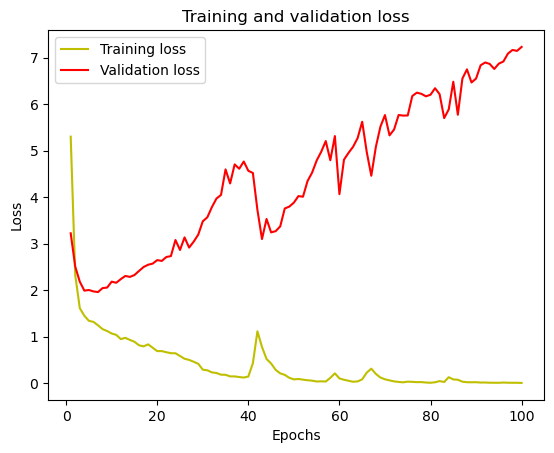

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

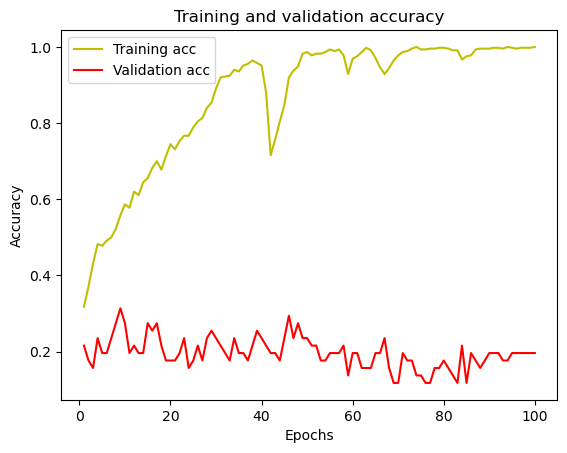

In [160]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [161]:
base_loss,base_accuracy=model.evaluate(X_test,y_test,batch_size=batch_size,verbose=1)
  
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

300/300 [==============================] - 5s 16ms/step - loss: 6.1029 - accuracy: 0.3349
Accuracy >33.486333
Base Loss >6.10


[ Fine-Tuning ] 

In [171]:
base_model = keras.models.Sequential(model.layers[:])

print("Number of layers in the base model: ", len(base_model.layers))

fine_tune_at = 3

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

new_model = keras.models.Sequential(base_model.layers[:-1])

new_model.add(keras.layers.Flatten())
new_model.add(Dropout(rate=0.5))
new_model.add(Dense(32, activation="relu"))
new_model.add(Dense(n_outputs,activation = "sigmoid"))

new_model.compile(loss="categorical_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])

Number of layers in the base model:  6


In [172]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in base_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.layers.rnn.lstm.LSTM object at 0x000001...,lstm_2,False
1,<keras.layers.rnn.lstm.LSTM object at 0x000001...,lstm_3,False
2,<keras.layers.regularization.dropout.Dropout o...,dropout_8,False
3,<keras.layers.core.dense.Dense object at 0x000...,dense_18,True
4,<keras.layers.regularization.dropout.Dropout o...,dropout_9,True
5,<keras.layers.core.dense.Dense object at 0x000...,dense_19,True


In [173]:
history2 = new_model.fit(X_train, y_train, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)
print(new_model.summary())

Epoch 1/20
15/15 [==============================] - 4s 77ms/step - loss: 2.4745 - accuracy: 0.3089 - val_loss: 2.2205 - val_accuracy: 0.2745
Epoch 2/20
15/15 [==============================] - 0s 22ms/step - loss: 1.3599 - accuracy: 0.5689 - val_loss: 2.4397 - val_accuracy: 0.2745
Epoch 3/20
15/15 [==============================] - 0s 22ms/step - loss: 0.8002 - accuracy: 0.7356 - val_loss: 2.6877 - val_accuracy: 0.2549
Epoch 4/20
15/15 [==============================] - 0s 22ms/step - loss: 0.6227 - accuracy: 0.8067 - val_loss: 2.8469 - val_accuracy: 0.2353
Epoch 5/20
15/15 [==============================] - 0s 23ms/step - loss: 0.5085 - accuracy: 0.8289 - val_loss: 3.0374 - val_accuracy: 0.2157
Epoch 6/20
15/15 [==============================] - 0s 23ms/step - loss: 0.4183 - accuracy: 0.8622 - val_loss: 3.2278 - val_accuracy: 0.2353
Epoch 7/20
15/15 [==============================] - 0s 24ms/step - loss: 0.3346 - accuracy: 0.8978 - val_loss: 3.3274 - val_accuracy: 0.2157
Epoch 8/20
15

[ Unfreeze ]

In [174]:
base_model.trainable = True
new_model.compile(loss="categorical_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])

In [175]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in base_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.layers.rnn.lstm.LSTM object at 0x000001...,lstm_2,True
1,<keras.layers.rnn.lstm.LSTM object at 0x000001...,lstm_3,True
2,<keras.layers.regularization.dropout.Dropout o...,dropout_8,True
3,<keras.layers.core.dense.Dense object at 0x000...,dense_18,True
4,<keras.layers.regularization.dropout.Dropout o...,dropout_9,True
5,<keras.layers.core.dense.Dense object at 0x000...,dense_19,True


In [176]:
history2 = new_model.fit(X_train, y_train, epochs=15, batch_size = 32, validation_split = 0.1, shuffle = True)
new_model.summary()

Epoch 1/15
15/15 [==============================] - 6s 159ms/step - loss: 0.1881 - accuracy: 0.9422 - val_loss: 4.8471 - val_accuracy: 0.2353
Epoch 2/15
15/15 [==============================] - 1s 56ms/step - loss: 0.1826 - accuracy: 0.9511 - val_loss: 5.0505 - val_accuracy: 0.2157
Epoch 3/15
15/15 [==============================] - 1s 56ms/step - loss: 0.1697 - accuracy: 0.9511 - val_loss: 4.9497 - val_accuracy: 0.1765
Epoch 4/15
15/15 [==============================] - 1s 57ms/step - loss: 0.1500 - accuracy: 0.9600 - val_loss: 5.0407 - val_accuracy: 0.2941
Epoch 5/15
15/15 [==============================] - 1s 60ms/step - loss: 0.1721 - accuracy: 0.9444 - val_loss: 5.1813 - val_accuracy: 0.1765
Epoch 6/15
15/15 [==============================] - 1s 61ms/step - loss: 0.1358 - accuracy: 0.9667 - val_loss: 5.3294 - val_accuracy: 0.2353
Epoch 7/15
15/15 [==============================] - 1s 57ms/step - loss: 0.1376 - accuracy: 0.9644 - val_loss: 5.3933 - val_accuracy: 0.1961
Epoch 8/15
1

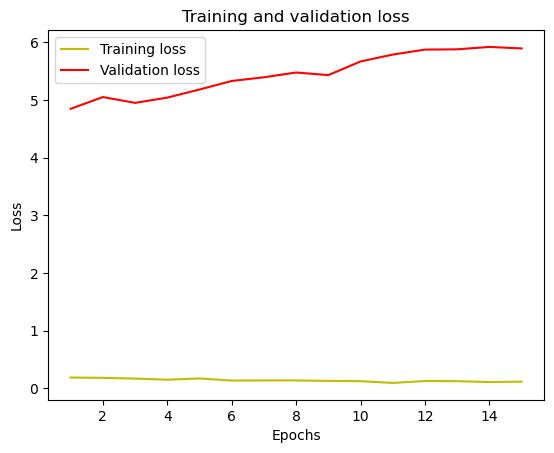

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

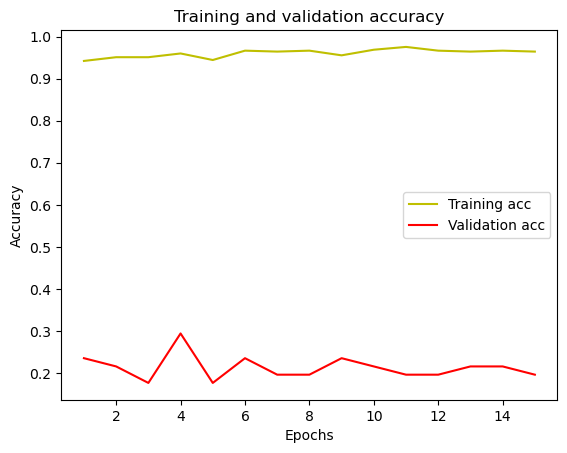

In [178]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [179]:
base_loss,base_accuracy=new_model.evaluate(X_test,y_test,batch_size=32,verbose=1)
  
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

300/300 [==============================] - 7s 25ms/step - loss: 4.7489 - accuracy: 0.3351
Accuracy >33.507198
Base Loss >4.75
